In [1]:
import time
import numpy as np

from conversions import *
import gnobs, models, functions
import read_pe_samples

%matplotlib inline
import matplotlib as mpl

import matplotlib.pyplot as plt
from importlib import reload

In [2]:
import sys
sys.path.append("analysis/")

# Define analysis
import o1o2o3_sfr_1pz as analysis

ModuleNotFoundError: No module named 'o1o2o3_sfr_1pz'

In [ ]:
params = {'font.family': 'serif',
          'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large','font.size':15}
plt.rcParams.update(params)
inches_to_cm = 2.54
figsize = (40/inches_to_cm, 13/inches_to_cm)

In [ ]:
reload(functions)

In [9]:
# Read data
nsamp = 4000
ifar_thr = 1.0
injections, pe = {}, {}
pe_dir = '/home/vaibhav.tiwari/scripts/rates_related/observational_data/o3_rnp_data/pe_sept2021/*o1o2*BBH*.hdf5'
pe['o1o2'] = read_pe_samples.read_pesamples(pe_dir, ifar_thr,nsamp)
pe_dir = '/home/vaibhav.tiwari/scripts/rates_related/observational_data/o3_rnp_data/pe_sept2021/*o3a*BBH*.hdf5'
pe['o3a'] = read_pe_samples.read_pesamples(pe_dir, ifar_thr, nsamp)
pe_dir = '/home/vaibhav.tiwari/scripts/rates_related/observational_data/o3_rnp_data/pe_sept2021/*o3b*BBH*.hdf5'
pe['o3b'] = read_pe_samples.read_pesamples(pe_dir, ifar_thr, nsamp)

fname = 'gw_data/injections/o1o2_bbhpop_siminj.hdf'
injections['o1o2'] = functions.read_injections_o1o2(fname)
fname = 'gw_data/injections/endo3_bbhpop-LIGO-T2100113-v9-1238166018-15843600.hdf5'
injections['o3a'] = functions.read_injections_o3(fname, ifar_thr, 'precessing')
fname = 'gw_data/injections/endo3_bbhpop-LIGO-T2100113-v9-1256655642-12905976.hdf5'
injections['o3b'] = functions.read_injections_o3(fname, ifar_thr, 'precessing')

In [10]:
# Read data
nsamp = 5000
ifar_thr = 1.0
my_pe = {}
pe_dir = 'gw_data/pe/*o1o2*BBH*.hdf5'
my_pe['o1o2'] = read_pe_samples.read_pesamples(pe_dir, ifar_thr,nsamp)
pe_dir = 'gw_data/pe/*o3a*BBH*.hdf5'
my_pe['o3a'] = read_pe_samples.read_pesamples(pe_dir, ifar_thr, nsamp)
pe_dir = 'gw_data/pe/*o3b*BBH*.hdf5'
my_pe['o3b'] = read_pe_samples.read_pesamples(pe_dir, ifar_thr, nsamp)

In [11]:
nn = 0
for obsrun in my_pe.keys():
    for obs in pe[obsrun].keys():
        print (obs, np.round(np.mean(my_pe[obsrun][obs]['q']), 2), np.round(np.mean(pe[obsrun][obs]['q']), 2), \
              '|', np.round(np.mean(my_pe[obsrun][obs]['mchirp_src']), 2), np.round(np.mean(pe[obsrun][obs]['mchirp_src']), 2))
        nn += 1

GW150914_o1o2_BBH_1000 0.89 0.85 | 28.12 28.66
GW151012_o1o2_BBH_126 0.59 0.59 | 15.84 15.38
GW151226_o1o2_BBH_1000 0.54 0.57 | 8.85 8.86
GW170104_o1o2_BBH_1000 0.74 0.66 | 20.97 21.5
GW170608_o1o2_BBH_1000 0.69 0.67 | 7.93 7.94
GW170729_o1o2_BBH_50 0.68 0.68 | 35.74 35.75
GW170809_o1o2_BBH_1000 0.73 0.7 | 25.23 25.0
GW170814_o1o2_BBH_1000 0.8 0.81 | 24.21 24.17
GW170818_o1o2_BBH_1000 0.78 0.75 | 26.45 26.65
GW170823_o1o2_BBH_1000 0.77 0.73 | 28.65 29.34
S190408an_o3a_BBH_1000 0.75 0.75 | 18.38 18.36
S190412m_o3a_BBH_1000 0.29 0.29 | 13.35 13.26
S190413ac_o3a_BBH_6 0.7 0.69 | 35.79 32.28
S190413i_o3a_BBH_1 0.72 0.71 | 24.87 24.26
S190421ar_o3a_BBH_354 0.75 0.77 | 31.2 30.87
S190503bf_o3a_BBH_1000 0.72 0.68 | 29.44 30.03
S190512at_o3a_BBH_1000 0.6 0.58 | 14.55 14.57
S190513bm_o3a_BBH_1000 0.59 0.56 | 22.38 21.81
S190517h_o3a_BBH_1000 0.7 0.69 | 25.9 25.9
S190519bj_o3a_BBH_1000 0.64 0.63 | 44.68 43.4
S190521g_o3a_BBH_744 0.73 0.74 | 67.76 67.73
S190521r_o3a_BBH_1000 0.77 0.78 | 32.19 32.

In [10]:
nn

69

In [32]:
# Read data
nsamp = 5400
ifar_thr = 1.0
injections, pev = {}, {}
pe_dir = 'my_gw_data/pe/*o1o2*BBH*.hdf5'
pev['o1o2'] = read_pe_samples.read_pesamples(pe_dir, ifar_thr,nsamp)
pe_dir = 'my_gw_data/pe/*o3a*BBH*.hdf5'
pev['o3a'] = read_pe_samples.read_pesamples(pe_dir, ifar_thr, nsamp)
pe_dir = 'my_gw_data/pe/*o3b*BBH*.hdf5'
pev['o3b'] = read_pe_samples.read_pesamples(pe_dir, ifar_thr, nsamp)

In [7]:
for obsrun in pe.keys():
    for obs in pev[obsrun].keys():
        mch = np.mean(pe[obsrun][obs]['mchirp_src'])
        if mch < 3:
            continue
        qstd = np.std(pe[obsrun][obs]['q'])
        qmu = np.mean(pe[obsrun][obs]['q'])
        #chieff = (pe[obsrun][obs]['spin1z'] + q * pe[obsrun][obs]['spin2z']) / (1 + q)
        mchv = np.mean(pev[obsrun][obs]['mchirp_src'])
        qvstd = np.std(pev[obsrun][obs]['q'])
        qvmu = np.mean(pev[obsrun][obs]['q'])
        print('{0:25s} {1:2.1f} {2:2.1f} | {3:3.2f} {4:3.2f} | {5:3.2f} {6:3.2f}'.format(obs, mch, mchv, qstd, qvstd, qmu, qvmu))
#S190517h


GW150914_o1o2_BBH_1000    28.1 28.5 | 0.08 0.10 | 0.88 0.85
GW151012_o1o2_BBH_126     15.8 15.7 | 0.20 0.23 | 0.59 0.61
GW151226_o1o2_BBH_1000    8.8 8.9 | 0.23 0.20 | 0.54 0.55
GW170104_o1o2_BBH_1000    21.0 21.6 | 0.15 0.16 | 0.74 0.65
GW170608_o1o2_BBH_1000    7.9 7.9 | 0.19 0.20 | 0.69 0.67
GW170729_o1o2_BBH_50      35.5 35.2 | 0.17 0.18 | 0.59 0.64
GW170809_o1o2_BBH_1000    25.2 25.2 | 0.15 0.16 | 0.73 0.69
GW170814_o1o2_BBH_1000    24.2 24.3 | 0.12 0.12 | 0.80 0.81
GW170818_o1o2_BBH_1000    26.5 26.8 | 0.13 0.14 | 0.79 0.75
GW170823_o1o2_BBH_1000    28.7 29.5 | 0.15 0.17 | 0.77 0.73
S190408an_o3a_BBH_1000    18.4 18.5 | 0.15 0.16 | 0.75 0.69
S190412m_o3a_BBH_1000     13.3 13.3 | 0.05 0.05 | 0.29 0.28
S190413a_o3a_BBH_1        35.9 34.0 | 0.18 0.20 | 0.70 0.68
S190413b_o3a_BBH_6        24.9 25.0 | 0.17 0.17 | 0.72 0.74
S190421ar_o3a_BBH_354     31.2 31.3 | 0.16 0.17 | 0.76 0.72
S190503bf_o3a_BBH_1000    29.5 30.3 | 0.16 0.18 | 0.72 0.68
S190512at_o3a_BBH_1000    14.5 14.5 | 0.15 0

In [8]:
obsrun = 'o3b'
obs = 'S191109d_o3b_BBH_1000'
q = pe[obsrun][obs]['q']
np.mean((pe[obsrun][obs]['spin1z'] + q * pe[obsrun][obs]['spin2z']) / (1 + q))

-0.28329088049065704

In [9]:
obsrun = 'o3b'
obs = 'S191109d_o3b_BBH_1000'
q = pev[obsrun][obs]['q']
np.mean((pev[obsrun][obs]['spin1z'] + q * pev[obsrun][obs]['spin2z']) / (1 + q))

0.3245332647305899

S190719an_o3a_BBH_2


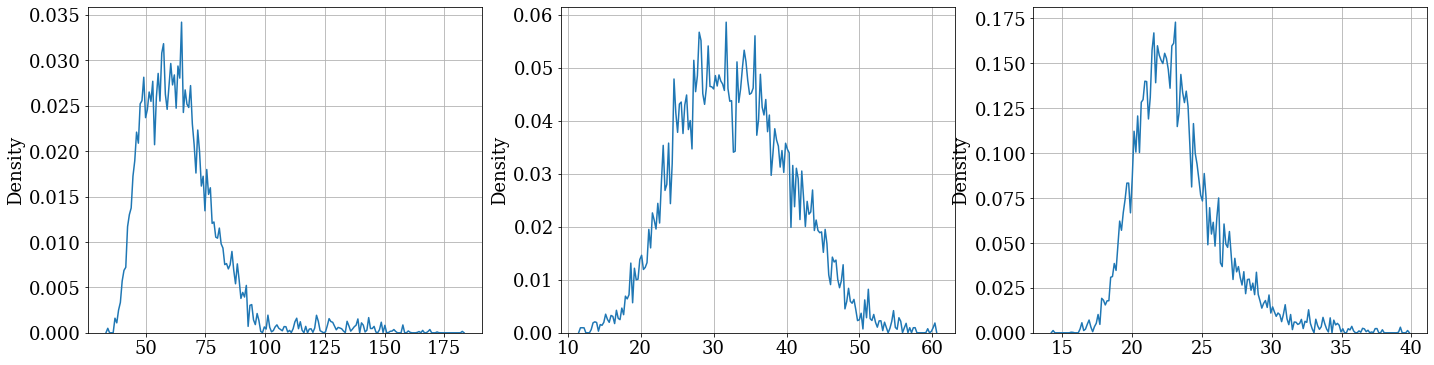

In [10]:
import seaborn
fig = plt.figure(figsize = (24.0, 6.0))
ii = 19
obsrun = 'o3a'
obs = list(pev[obsrun].keys())[ii]
plt.subplot(1, 3, 1)
m1 = pev[obsrun][obs]['mass1']
seaborn.kdeplot(m1, bw_method = 0.01)
plt.grid()
plt.subplot(1, 3, 2)
m2 = pev[obsrun][obs]['mass2']
seaborn.kdeplot(m2, bw_method = 0.01)
plt.grid()
plt.subplot(1, 3, 3)
m2 = pev[obsrun][obs]['mchirp_src']
seaborn.kdeplot(m2, bw_method = 0.01)
plt.grid()
print (obs)

In [11]:
for obsrun in pe.keys():
    for obs in pe[obsrun].keys():
        mch = np.round(np.mean(pe[obsrun][obs]['mchirp_src']), 1)
        if mch < 16. and mch >12.:
            print (obs, mch)

GW151012_o1o2_BBH_126 15.8
S190412m_o3a_BBH_1000 13.3
S190512at_o3a_BBH_1000 14.5
S190708ap_o3a_BBH_1000 13.0
S190828l_o3a_BBH_1000 13.7
S190925ad_o3a_BBH_139 15.0
S200225q_o3b_BBH_1000 14.1


In [12]:
reload(analysis)

<module 'o1o2o3_sfr_1pz_rnp' from 'analysis/o1o2o3_sfr_1pz_rnp.py'>

In [13]:
data_analysis = {}
data_analysis['pe'] = pe
data_analysis['injections'] = injections
data_analysis['analysis'] = analysis

In [15]:
reload(functions)

<module 'functions' from '/nfshome/store04/users/vaibhav.tiwari/scripts/rates_related/vamana/functions.py'>

In [16]:
t0 = time.time()
results = functions.function_gauss(data_analysis)
print ('Computation Time:', np.round(time.time() - t0, 1))

/nfshome/store04/users/vaibhav.tiwari/scripts/rates_related/vamana/functions.py:159: RuntimeWarning: overflow encountered in exp
  ratio = np.exp(logsum_sumprob - log_lkl)


1 1 0 0 69.93
2 2 0 0 69.63
3 3 0 0 69.44
4 4 0 0 65.3
5 5 0 0 65.72
6 6 0 0 66.86
7 7 0 0 65.25
8 8 0 0 65.55
9 9 0 0 68.25
10 10 0 0 70.55
11 11 0 0 70.54
12 12 0 0 70.05
13 13 0 0 69.83
14 14 0 0 71.34
15 15 0 0 72.52
16 16 0 0 72.61
17 17 0 0 72.61
18 18 0 0 70.41
19 19 0 0 69.81
21 20 0 0 71.3
22 21 0 0 73.4
23 22 0 0 76.01
24 23 0 0 74.74
25 24 0 0 71.17
26 25 0 0 75.64
27 26 0 0 75.45
28 27 0 0 77.49
29 28 0 0 79.64
31 29 0 0 79.49
32 30 0 0 83.13
33 31 0 0 83.15
34 32 0 0 84.99
35 33 0 0 86.49
36 34 0 0 84.92
37 35 0 0 82.13
38 36 0 0 83.29
39 37 0 0 83.8
40 38 0 0 84.6
41 39 0 0 83.1
42 40 0 0 80.6
44 41 0 0 80.78
45 42 0 0 78.66
47 43 0 0 78.69
49 44 0 0 78.61
50 45 0 0 78.55
51 46 0 0 78.59
52 47 0 0 78.33
53 48 0 0 82.3
54 49 0 0 80.44
55 50 0 0 84.79
56 51 0 0 83.8
57 52 0 0 80.09
58 53 0 0 79.32
61 54 0 0 77.71
62 55 0 0 73.65
63 56 0 0 70.46
65 57 0 0 73.34
66 58 0 0 70.24
67 59 0 0 71.9
68 60 0 0 72.16
69 61 0 0 76.57
70 62 0 0 79.26
71 63 0 0 78.37
72 64 0 0 78.8
75 65

KeyboardInterrupt: 